In [35]:
import pandas as pd
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,NaN,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,NaN,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


C:\Users\junai\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


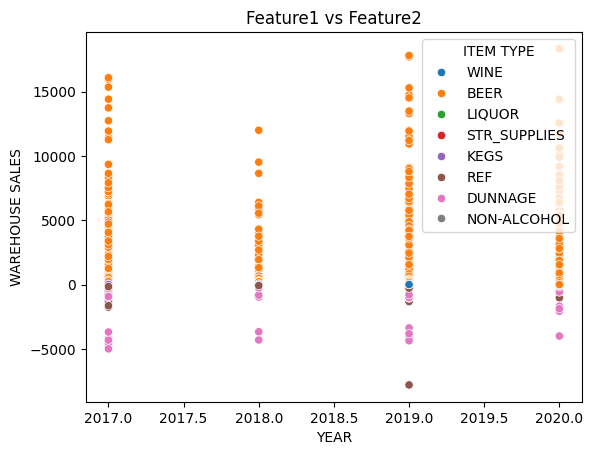

In [17]:
sns.scatterplot(data=df, x='YEAR', y='WAREHOUSE SALES', hue='ITEM TYPE')
plt.title("Feature1 vs Feature2")
plt.show()

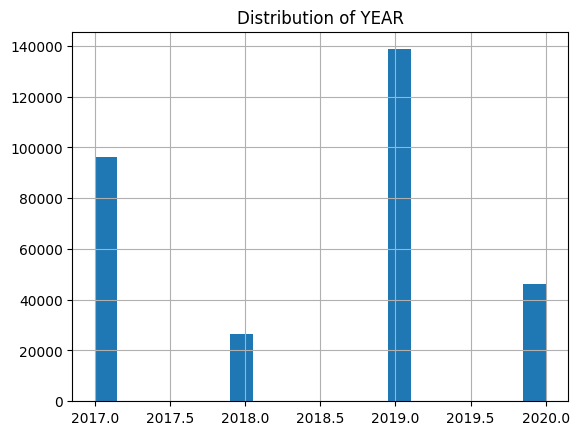

In [18]:
df['YEAR'].hist(bins=20)
plt.title('Distribution of YEAR')
plt.show()

In [30]:
print(df.isnull().sum())  # or .dropna(), .fillna('value')

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          5
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64


In [36]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,NaN,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,NaN,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [40]:
df.fillna(0, inplace=True)
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [44]:
# Calculate Q1 and Q3
Q1 = df['WAREHOUSE SALES'].quantile(0.25)
Q3 = df['WAREHOUSE SALES'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['WAREHOUSE SALES'] < lower_bound) | (df['WAREHOUSE SALES'] > upper_bound)]

# Display the outliers (for screenshot)
print("Detected Outliers:")
print(outliers)

# Remove outliers
df_cleaned = df[(df['WAREHOUSE SALES'] >= lower_bound) & (df['WAREHOUSE SALES'] <= upper_bound)]

# Optional: Compare shapes before and after (for screenshot)
print("Original dataset size:", df.shape)
print("Dataset after removing outliers:", df_cleaned.shape)


Detected Outliers:
        YEAR  MONTH                  SUPPLIER ITEM CODE  \
33      2020      1  ALLAGASH BREWING COMPANY     10271   
61      2020      1               LEGENDS LTD     10437   
78      2020      1           ROYAL WINE CORP    105031   
141     2020      1               LEGENDS LTD     10932   
143     2020      1               LEGENDS LTD     10936   
...      ...    ...                       ...       ...   
307601  2020      9                         0        WC   
307614  2020      9               LEGENDS LTD     11549   
307615  2020      9       SALVETO IMPORTS LLC    235626   
307616  2020      9    MILLER BREWING COMPANY     23837   
307633  2020      9            THE WINE GROUP     76279   

                            ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
33              ALLAGASH SAISON 6/4 NR 12.0Z      BEER           0.0   
61      CRISPIN CIDER ORIGINAL 4/6 NR - 12OZ      BEER           0.0   
78                CH DE LA GRAVE RED - 750ML      WINE  

In [45]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 1.0
Q3: 4.0
IQR: 3.0
Lower Bound: -3.5
Upper Bound: 8.5


In [46]:
print(outliers.head())

     YEAR  MONTH                  SUPPLIER ITEM CODE  \
33   2020      1  ALLAGASH BREWING COMPANY     10271   
61   2020      1               LEGENDS LTD     10437   
78   2020      1           ROYAL WINE CORP    105031   
141  2020      1               LEGENDS LTD     10932   
143  2020      1               LEGENDS LTD     10936   

                         ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
33           ALLAGASH SAISON 6/4 NR 12.0Z      BEER           0.0   
61   CRISPIN CIDER ORIGINAL 4/6 NR - 12OZ      BEER           0.0   
78             CH DE LA GRAVE RED - 750ML      WINE           0.0   
141                FOUNDERS ALL DAY - 4/6      BEER           0.0   
143          FOUNDERS DIRTY BASTARD - 4/6      BEER           0.0   

     RETAIL TRANSFERS  WAREHOUSE SALES  
33                0.0              9.0  
61                0.0             25.0  
78                0.0             10.0  
141               0.0             45.0  
143               0.0             13.0  


In [47]:
print(df.shape)
print(df_cleaned.shape)

(146395, 9)
(128715, 9)


In [49]:
# Sample 30% of the data to reduce size
df_sampled = df.sample(frac=0.3, random_state=42)

print("Original size:", df.shape)
print("Reduced size:", df_sampled.shape)


Original size: (146395, 9)
Reduced size: (43918, 9)


In [50]:
df_reduced = df_sampled.drop(columns=['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION'], errors='ignore')

print("Remaining columns:", df_reduced.columns.tolist())


Remaining columns: ['YEAR', 'MONTH', 'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']


In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_reduced['WAREHOUSE SALES (Scaled)'] = scaler.fit_transform(df_reduced[['WAREHOUSE SALES']])
df_reduced[['WAREHOUSE SALES', 'WAREHOUSE SALES (Scaled)']].head()


,WAREHOUSE SALES,WAREHOUSE SALES (Scaled)
185216,9.0,0.515183
260135,2.0,0.514462
298801,2.0,0.514462
137162,2.0,0.514462
256916,0.0,0.514256


In [55]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.1 MB 13.1 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.1 MB 13.7 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 13.9 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 12.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   -- ------------------------------------- 2.4/41.0 MB 14.3 MB/s eta 0:00:03
   ---- ----------------------------------- 5.0/41.0 MB 11.3 MB/s eta 0:00:04
   ------- -------------------------------- 7.9/41.0 MB 12.3 MB/s eta 0:00:03
   ---------- ----------------------------- 10.7/41.0 MB 12.7 MB/s eta 0:00:03
   ------------- -------------------------- 13.9/41.0 MB 13.0 MB/s eta 0:00:03
   ---------------- ----------------------- 16.8/41.0 MB 13.2 MB/s eta 0:00:

In [58]:
df_reduced['WAREHOUSE SALES (Binned)'] = pd.cut(
    df_reduced['WAREHOUSE SALES'], 
    bins=3, 
    labels=['Low', 'Medium', 'High']
)

df_reduced['WAREHOUSE SALES (Binned)'].value_counts()
df_reduced[['WAREHOUSE SALES', 'WAREHOUSE SALES (Binned)']].head()

,WAREHOUSE SALES,WAREHOUSE SALES (Binned)
185216,9.0,Medium
260135,2.0,Medium
298801,2.0,Medium
137162,2.0,Medium
256916,0.0,Medium


In [59]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43918 entries, 185216 to 47406
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   YEAR                      43918 non-null  int64   
 1   MONTH                     43918 non-null  int64   
 2   ITEM TYPE                 43918 non-null  object  
 3   RETAIL SALES              43918 non-null  float64 
 4   RETAIL TRANSFERS          43918 non-null  float64 
 5   WAREHOUSE SALES           43918 non-null  float64 
 6   WAREHOUSE SALES (Scaled)  43918 non-null  float64 
 7   WAREHOUSE SALES (Binned)  43918 non-null  category
dtypes: category(1), float64(4), int64(2), object(1)
memory usage: 2.7+ MB


In [60]:
df_reduced.describe()


,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,WAREHOUSE SALES (Scaled)
count,43918.000000,43918.000000,43918.000000,43918.000000,43918.000000,43918.000000
mean,2018.494171,6.362835,0.020962,0.119551,12.817421,0.515576
std,1.072651,3.412703,0.050133,2.488261,123.979050,0.012762
min,2017.000000,1.000000,-0.110000,-11.330000,-4996.000000,0.000000
25%,2017.000000,3.000000,0.000000,0.000000,1.000000,0.514359
50%,2019.000000,7.000000,0.000000,0.000000,1.000000,0.514359
75%,2019.000000,9.000000,0.000000,0.000000,4.000000,0.514668
max,2020.000000,12.000000,0.200000,256.000000,4719.000000,1.000000


In [61]:
warehouse_sales = df_reduced['WAREHOUSE SALES']

print("Min:", warehouse_sales.min())
print("Max:", warehouse_sales.max())
print("Mean:", warehouse_sales.mean())
print("Median:", warehouse_sales.median())
print("Mode:", warehouse_sales.mode().iloc[0])


Min: -4996.0
Max: 4719.0
Mean: 12.817421330661688
Median: 1.0
Mode: 1.0


In [62]:
Q1 = warehouse_sales.quantile(0.25)
Q3 = warehouse_sales.quantile(0.75)
IQR = Q3 - Q1

print("Range:", warehouse_sales.max() - warehouse_sales.min())
print("Q1 (25%):", Q1)
print("Q3 (75%):", Q3)
print("IQR:", IQR)
print("Variance:", warehouse_sales.var())
print("Standard Deviation:", warehouse_sales.std())


Range: 9715.0
Q1 (25%): 1.0
Q3 (75%): 4.0
IQR: 3.0
Variance: 15370.804791722241
Standard Deviation: 123.97904980972487


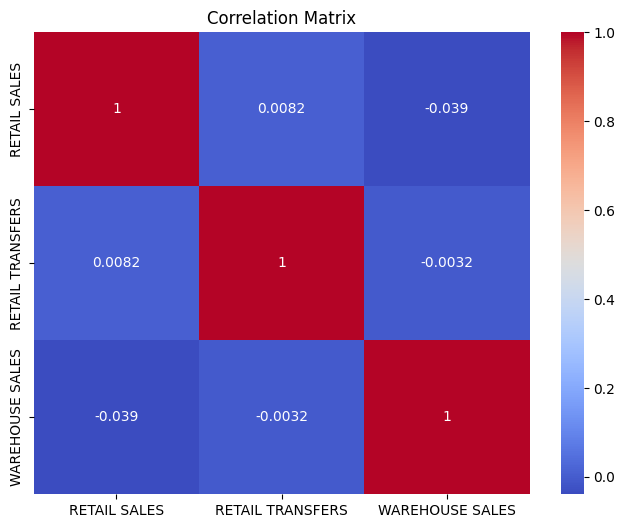

In [63]:
correlation_matrix = df_reduced[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
